In [1]:
!pip install sklearn_rvm



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn_rvm import EMRVC

In [18]:
def makemeshgrid(x,y,h=.02):
    x_min,x_max = x.min()-1,x.max()+1
    y_min,y_max = y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    return xx,yy

In [19]:
def plot_contours(ax,clf,xx,yy,**params):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx,yy,Z,**params)
    return out

In [20]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [21]:
models=(EMRVC(kernel='linear'),
        EMRVC(kernel='rbf'),
        EMRVC(kernel='sigmoid'))
models=(clf.fit(X,y) for clf in models)
titles = ('RVC with linear kernel',
          'RVC with RBF kernel')

C:\Users\chand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn_rvm\em_rvm.py:675: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
C:\Users\chand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn_rvm\em_rvm.py:675: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
C:\Users\chand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn_rvm\em_rvm.py:675: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid t

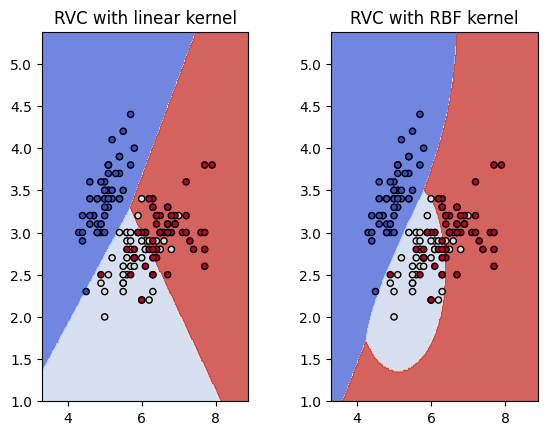

In [22]:
fig,sub=plt.subplots(1,2)

plt.subplots_adjust(wspace=0.4,hspace=0.4)
X0,X1=X[:, 0],X[:,1]
xx,yy = makemeshgrid(X0,X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax,clf,xx,yy,
                 cmap=plt.cm.coolwarm,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
    ax.set_title(title)
    
plt.show()